# Python Data Preprocessing

### Data Quality

+ Today’s real-world data likely origins from multiple, heterogeneous sources
+ Therefore, we are very likely to handle low-quality data
+ It is important to properly address data quality issues
+ Even simple descriptive analysis can be applied such that:
  - Sort all values in ascending or descending order
    1. If all values are identical: no information. Ignore this variable!
    2. If some values occur abnormally with very high frequency (e.g., "Alabama" in 20% cases for state entry: need to examine whether it is caused by any interesting pattern (e.g., football fan survey) or error (e.g., default value)
+ All techniques (e.g., data cleaning, integration, reduction, transformation, and discretization) related to data quality need to be properly addressed

In this exercise, we are going to utilize a dataset distributed as a part of the Yelp Dataset Challenge (https://www.yelp.com/dataset). The ultimate goal is to create a classifier to predict the usefulness of each review by using various attributes. For instance, the count of words can be a good indicator of the usefulness of reviews because longer reviews can deliver more information than shorter reviews can do. The sentiment of reviews might be important because too positive/negative reviews might not be objective. Metrics related to social networks such as degree, betweenness, and eigenvector might be important by representing the social status of reviewers. To achieve the ultimate goal, preprocessing data is the first step. Let's open the data. There are 1,000 tuples and 26 attributes. The names of attributes are self-explanatory.

In [1]:
## Imports all necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import linalg
from scipy import stats

## This loads the csv file from disk
yelp_data = pd.read_csv(
    filepath_or_buffer = "./data/Yelp_Usefulness_Practice.csv", sep = ",", header=0 )

print(yelp_data.head(20))
## print the dimension of the data
print(yelp_data.shape)

                   review_id  review_stars  word_count  lexical_diversity  \
0     bRGHgwAd3zfiiDMT9JyKcA             1          23           0.869565   
1     TK-0pfhHorvwZK0YhDe2fQ             5          26           0.769231   
2     XTOQ6blQzzzoK26QRJl3zg             5          71           0.760563   
3     KA9VwKYL-7I2LuQnXeuEBw             5          74           0.689189   
4     C2kblEfR4oMWR9oGhYN2cQ             5          31           0.903226   
5     mTA_VwPiWw6cubKHAsrIkQ             5          32           0.875000   
6     cnZI2W7C-D_w38WHMRer3w             1         124           0.572581   
7     UlxgrLCL9WOjJL5hZ1Zd9A             2         374           0.631016   
8     P5Sx85NU3sALCtbOx1Qgvg             2          45           0.888889   
9     Agb8ItmoRPyXPdQ8jLEgJw             4          60           0.633333   
10    g-JmmzYa4PDRKTWhuXPurg             5          21           0.761905   
11  "-jxAByrXxlQXMYbx-s37JQ"             5          97           0.762887   

### Applying descriptive analysis

As explained earlier, we can apply a descriptive analysis to understand the distribution of data. We can count the number of unique values as well.

In [2]:
## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)

## Pandas' describe method can provide basic statistics for numeric variables at default
print(yelp_data.describe())

       review_stars   word_count  lexical_diversity  correct_spell_ratio  \
count   1000.000000  1000.000000        1000.000000          1000.000000   
mean       3.604000    87.588000           0.770577             0.881534   
std        1.534124    85.127098           0.100830             0.055464   
min        1.000000     3.000000           0.438134             0.444444   
25%        2.000000    32.000000           0.703216             0.850000   
50%        4.000000    58.000000           0.771373             0.886020   
75%        5.000000   112.000000           0.838710             0.914679   
max        5.000000   664.000000           1.000000             1.000000   

       price_included  procon_included          joy         love    affection  \
count     1000.000000      1000.000000  1000.000000  1000.000000  1000.000000   
mean         0.006003         0.003000     0.000016     0.002612     0.000011   
std          0.012553         0.054717     0.000502     0.009139     0.0

In [3]:
## In the above, only 24 attributes got results.
## We need to select "only" categorical attributes to get descriptive statistics for categorical attributes
print(yelp_data[["review_id", "class"]].describe())

                     review_id       class
count                     1000        1000
unique                    1000           2
top     dw7JgmhbFL_VDRqYzZ4nVA  not_useful
freq                         1         507


For the categorical attributes, we found that there are no cases such that all values are identical or some values occur abnormally with very high frequency. 

However, in the case of numeric attributes, we found that there are three missing values in the "liking" attribute. The total count of tuples is 997, although all other attributes' count is 1,000. We can also check missing values by using Pandas' isna method. Also, "dislike" attribute has all zero values. That said, we need to drop this attribute by using Pandas' drop method. However, we will keep this for now.

In [4]:
## Show the number of data per attributes that has missing values
print(yelp_data.isna().sum())

review_id                0
review_stars             0
word_count               0
lexical_diversity        0
correct_spell_ratio      0
price_included           0
procon_included          0
joy                      0
love                     0
affection                0
liking                   3
enthusiasm               0
sadness                  0
dislike                  0
despair                  0
horror                   0
distress                 0
FleschReadingEase        0
user_review_count        0
yelping_months           0
degree                   0
betweenness              0
eigenvector              0
business_stars           0
business_review_count    0
class                    0
dtype: int64


In [5]:
## check the missing values across tuples of the "liking" attribute
print(yelp_data["liking"].isna())

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: liking, Length: 1000, dtype: bool


Now, let's create a box plot to see the distribution of the "liking" attribute. This will help us to determine how to handle the missing data.

Text(0.5, 1.0, "The normalized number of words related to 'liking' sentiment")

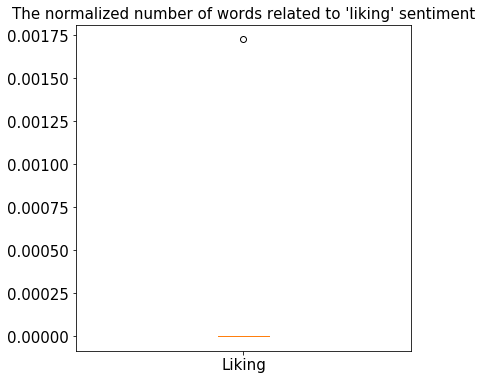

In [6]:
## Initialize a 6 x 6in figure
fig = plt.figure(figsize = (6, 6))

## Make the box plot
plt.boxplot(
    ## We beed to drop tuples that include missing values
    yelp_data["liking"][~yelp_data["liking"].isna()], labels = ["Liking"]
)

## Adjust the tick and label font size
plt.tick_params(labelsize = 15)

## Set the title
plt.title("The normalized number of words related to 'liking' sentiment", fontsize = 15)

It seems that most of the values are zeros except for one tuple. It is skewed. Therefore, it might be better to use the median central tendency.

In [7]:
## We should exclude missing tuples to get median
median = np.median(yelp_data["liking"][~yelp_data["liking"].isna()])
print ("The median is: ", median)

## Replace missing values with median 
yelp_data["liking"].fillna(median, inplace=True)

## Check whether the missing value were filled
print(yelp_data.isna().sum())

The median is:  0.0
review_id                0
review_stars             0
word_count               0
lexical_diversity        0
correct_spell_ratio      0
price_included           0
procon_included          0
joy                      0
love                     0
affection                0
liking                   0
enthusiasm               0
sadness                  0
dislike                  0
despair                  0
horror                   0
distress                 0
FleschReadingEase        0
user_review_count        0
yelping_months           0
degree                   0
betweenness              0
eigenvector              0
business_stars           0
business_review_count    0
class                    0
dtype: int64


### Outlier Detection
We can use Z-score and IQR score to detect ourliers. There are other methods, too.

In [8]:
## The first attribute (review_id) and the last attribute (class) are categorical
## Therefore, we cannot calculate z-score 
## The "dislike" attribute has 0 mean and sd. Therefore, we cannot calculate z score.
## We create indices that exclude review_id, dislike, and class
positions = list(range(1,13))
positions.extend(list(range(14,25)))

z = np.abs(stats.zscore(yelp_data.iloc[:, positions]))
print(z)

[[1.69823455 0.75910397 0.98222214 ... 0.32357593 1.05436955 0.52055472]
 [0.91042067 0.72384491 0.01336026 ... 0.32357593 0.95267909 0.09287036]
 [0.91042067 0.19495907 0.09936362 ... 0.32357593 0.95267909 0.23824012]
 ...
 [0.91042067 0.00691077 0.57485348 ... 0.32357593 0.95267909 0.52821931]
 [0.25825687 0.46320997 0.45810599 ... 0.32357593 1.72338577 0.55427893]
 [1.04607074 2.76680163 2.54659861 ... 0.32357593 1.72338577 0.53128515]]


The above numbers represent z scores of our data. It is difficult to say which data point is an outlier. Let’s try and define a threshold to identify an outlier. To be conservative, we will use 3 as a threshold. We can exclude 0.3% of data.

In [9]:
threshold = 3
print(np.where(z > 3))

(array([  7,  18,  18,  20,  21,  32,  38,  42,  44,  44,  52,  64,  64,
        69,  69,  69,  69,  69,  69,  72,  76,  76,  77,  78,  79,  82,
        82,  89, 102, 106, 121, 121, 124, 129, 135, 146, 150, 151, 152,
       152, 152, 160, 162, 168, 178, 179, 186, 193, 195, 200, 205, 211,
       212, 212, 212, 221, 225, 226, 226, 228, 232, 238, 242, 243, 262,
       262, 262, 262, 262, 262, 263, 267, 277, 281, 286, 291, 291, 299,
       301, 312, 321, 323, 323, 323, 328, 330, 332, 332, 335, 336, 338,
       338, 340, 341, 348, 349, 350, 353, 360, 373, 373, 373, 373, 373,
       374, 375, 375, 375, 379, 385, 385, 385, 386, 394, 395, 406, 406,
       406, 406, 412, 423, 424, 425, 432, 436, 437, 437, 442, 442, 442,
       449, 452, 454, 455, 456, 466, 474, 478, 478, 483, 484, 486, 491,
       493, 497, 503, 505, 507, 511, 512, 512, 512, 516, 519, 520, 520,
       520, 521, 522, 523, 534, 540, 543, 547, 552, 555, 561, 563, 563,
       565, 566, 580, 582, 585, 585, 585, 585, 585, 588, 594, 5

The first array contains the list of row numbers, and the second array corresponding column numbers that have a Z-score higher than 3, which mean they are: z[7][1], z[18][17], z[18][23], and so on.

We may want to remove tuples in which the most attributes are outliers. We can remove all tuples regardless of the number of attributes that are outliers. For this exercise, we adopt a very conservative approach. Therefore, we count the frequency of tuples that includes outliers.

In [10]:
unique_elements, counts_elements = np.unique(np.where(z > 3)[0], return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  7  18  20  21  32  38  42  44  52  64  69  72  76  77  78  79  82  89
  102 106 121 124 129 135 146 150 151 152 160 162 168 178 179 186 193 195
  200 205 211 212 221 225 226 228 232 238 242 243 262 263 267 277 281 286
  291 299 301 312 321 323 328 330 332 335 336 338 340 341 348 349 350 353
  360 373 374 375 379 385 386 394 395 406 412 423 424 425 432 436 437 442
  449 452 454 455 456 466 474 478 483 484 486 491 493 497 503 505 507 511
  512 516 519 520 521 522 523 534 540 543 547 552 555 561 563 565 566 580
  582 585 588 594 597 602 615 628 635 638 639 644 646 647 650 660 663 664
  668 671 676 687 692 695 700 704 717 736 752 753 756 762 770 778 784 785
  791 794 802 805 807 814 821 823 826 831 837 840 843 854 855 856 861 878
  890 891 895 901 909 910 915 922 928 929 930 944 945 950 957 964 969 974
  992 994 998]
 [  1   2   1   1   1   1   1   2   1   2   6   1   2   1   1   1   2   1
    1   1   2   1   1   1   1   1   1   3   1   1   1   1   1   1   1   1
    1   1   1   3   1  

The first list represents the row number when the z score is larger than 3. The second list represents the frequency of the corresponding row. The row 69 and 262 have the largest number of outliers. Therefore, we want to remove these tuples from the dataset.

In [11]:
yelp_data = yelp_data.drop([ 69, 262])

print(yelp_data.shape)

(998, 26)


As you can see, two tuples were dropped. I will leave outlier detection exercise using IQR to you.

### Data Integration
One potential problem in data integration is redundancies in attributes and/or tuples. As for attributes, we can check redundancies by applying correlation analysis.

In [12]:
pcorr = yelp_data.corr(method='pearson')

## Set the maximum number of columns as "None" to display all columns
pd.set_option('display.max_columns', None)
pcorr

review_stars  word_count  lexical_diversity  \
review_stars               1.000000   -0.170021           0.204540   
word_count                -0.170021    1.000000          -0.735709   
lexical_diversity          0.204540   -0.735709           1.000000   
correct_spell_ratio        0.060523   -0.041080          -0.051145   
price_included            -0.065094    0.018127          -0.029167   
procon_included           -0.033460    0.007047          -0.001079   
joy                        0.028886   -0.009445           0.026444   
love                       0.194802   -0.080846           0.048432   
affection                 -0.004429    0.054247          -0.053817   
liking                     0.028886    0.188224          -0.073302   
enthusiasm                -0.013611    0.098475          -0.058314   
sadness                   -0.016769    0.025171          -0.017008   
dislike                         NaN         NaN                NaN   
despair                   -0.053717   -0.016327          -0.006471   
horror                    -0.173463   -0.027250           0.015037   
distress                  -0.022414    0.080246          -0.085817   
FleschReadingEase         -0.081457   -0.023573          -0.086771   
user_review_count          0.030185    0.252227          -0.176337   
yelping_months            -0.002904    0.211398          -0.127009   
degree                     0.026548    0.237305          -0.171410   
betweenness                0.020023    0.135053          -0.089077   
eigenvector                0.020716    0.256957          -0.184890   
business_stars             0.518086   -0.074549           0.080095   
business_review_count      0.072113    0.059020          -0.033471   

                       correct_spell_ratio  price_included  procon_included  \
review_stars                      0.060523       -0.065094        -0.033460   
word_count                       -0.041080        0.018127         0.007047   
lexical_diversity                -0.051145       -0.029167        -0.001079   
correct_spell_ratio               1.000000       -0.029505        -0.050238   
price_included                   -0.029505        1.000000        -0.019245   
procon_included                  -0.050238       -0.019245         1.000000   
joy                              -0.015391       -0.015161        -0.001739   
love                              0.046404       -0.048569        -0.006096   
affection                         0.011158       -0.009831        -0.002448   
liking                           -0.005457       -0.010805        -0.001739   
enthusiasm                       -0.008840       -0.030156        -0.003645   
sadness                           0.020803        0.010361        -0.003815   
dislike                                NaN             NaN              NaN   
despair                           0.002655       -0.015161        -0.001739   
horror                            0.043493       -0.001352        -0.008551   
distress                          0.015185       -0.029757        -0.005408   
FleschReadingEase                 0.194019       -0.015604        -0.069835   
user_review_count                -0.073402       -0.008732         0.186233   
yelping_months                   -0.038131        0.020709         0.022103   
degree                           -0.013847       -0.032067         0.098879   
betweenness                      -0.000903       -0.040461         0.060937   
eigenvector                      -0.021176       -0.021566         0.097530   
business_stars                    0.020939       -0.046303        -0.033381   
business_review_count            -0.015332        0.036795        -0.023078   

                            joy      love  affection    liking  enthusiasm  \
review_stars           0.028886  0.194802  -0.004429  0.028886   -0.013611   
word_count            -0.009445 -0.080846   0.054247  0.188224    0.098475   
lexical_diversity      0.026444  0.048432  -0.053817 -0.073302

It is hard to see. We can use a heatmap to visualize the correlation coefficients.

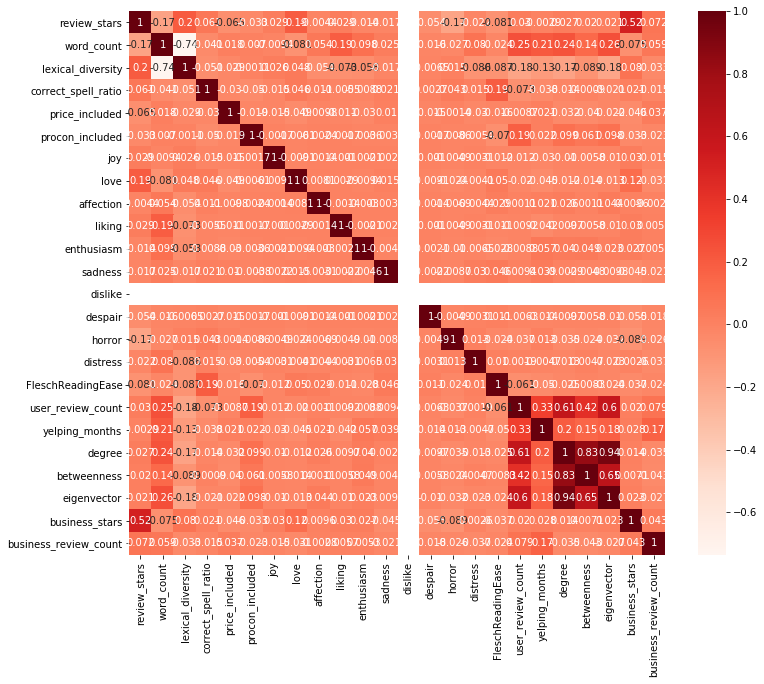

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(pcorr, annot=True, cmap=plt.cm.Reds)
plt.show()

We found the strongest correlation (0.94) between degree and eigenvector. The degree and betweenness are also strongly correlated (0.83). These results represent redundancies in attributes. We can drop one or two of them. However, we will leave it to the feature subset selection method in this exercise.

### Data Integration 2
One common challenge in data integration is attribute construction. New attributes need to be constructed from the given ones if existing attributes do not adequately reflect the target label/value. For instance, the "area" is a better indicator of housing prices than the "length" and "width" of a house. We observed that attributes related to sentiment are sparse. Most of them are zeros. We will create new attributes from the given ones. The attributes in the left of the arrow mark are existing ones, and the attributes in the right are new ones.
+ joy, love, affection, liking, enthusiasm -> positive_emotion
+ sadness, dislike, despair, horror, distress -> negative_emotion

In [14]:
yelp_data["positive_emotion"] = yelp_data["joy"] + yelp_data["love"] + yelp_data["affection"] + yelp_data["liking"] + yelp_data["enthusiasm"]
yelp_data["negative_emotion"] = yelp_data["sadness"] + yelp_data["dislike"] + yelp_data["despair"] + yelp_data["horror"] + yelp_data["distress"]

## Drop existing attributes
yelp_data = yelp_data.drop(["joy", "love", "affection", "liking", "enthusiasm", "sadness", "dislike", "despair", "horror", "distress"], 1)    

print(yelp_data.head())

                review_id  review_stars  word_count  lexical_diversity  \
0  bRGHgwAd3zfiiDMT9JyKcA             1          23           0.869565   
1  TK-0pfhHorvwZK0YhDe2fQ             5          26           0.769231   
2  XTOQ6blQzzzoK26QRJl3zg             5          71           0.760563   
3  KA9VwKYL-7I2LuQnXeuEBw             5          74           0.689189   
4  C2kblEfR4oMWR9oGhYN2cQ             5          31           0.903226   

   correct_spell_ratio  price_included  procon_included  FleschReadingEase  \
0             0.869565        0.000000                0            81.1310   
1             0.846154        0.000000                0            48.9568   
2             0.943662        0.014085                0            95.9393   
3             0.905405        0.000000                0            86.9222   
4             0.903226        0.000000                0            63.0018   

   user_review_count  yelping_months  degree  betweenness  eigenvector  \
0           

### Dimensionality Reduction + Normalization
As a method of data reduction, we can apply dimensionality reduction. We covered PCA and feature subset selection in the lecture. In this exercise, we will cover feature subset selection. We are also going to apply normalization before selecting a feature subset. We will implement the forward selection and bi-directional stepwise selection.

In [15]:
## Create feature matrix by dropping the review_id and label attribute
## Review_id is not going to helpful to predict the usefulness of reviews
X = yelp_data.drop(["review_id","class"], 1)    

## Pre-processing. Sklearn takes integer as label
# ## Create target attribute
yelp_data[yelp_data['class'] == 'useful'] = 1
yelp_data[yelp_data['class'] == 'not_useful'] = 0

# ## Specify the data type. Before specifying, the type was unknown
y = yelp_data["class"].astype('int')

print(yelp_data["class"])

0      1
1      1
2      0
3      1
4      1
      ..
995    1
996    1
997    1
998    0
999    1
Name: class, Length: 998, dtype: int64


In [16]:
print(X.shape[1])

## import the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing

## Apply Min_Max Scaler
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
X_minmax = pd.DataFrame(X_minmax)

## Sequential Forward Selection(sfs)
## Please refer to http://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#sequential-feature-selector
## for the detailed arguments options
sfs = SFS(MultinomialNB(),
           k_features=(1,X_minmax.shape[1]),
           forward=True, 
           floating=False,
           scoring = 'r2',
           cv = 10)

sfs.fit(X, y)
## Get the final set of features
sfs.k_feature_names_     

16


('review_stars',
 'word_count',
 'lexical_diversity',
 'correct_spell_ratio',
 'price_included',
 'procon_included',
 'FleschReadingEase',
 'degree',
 'betweenness',
 'eigenvector',
 'business_stars',
 'positive_emotion',
 'negative_emotion')

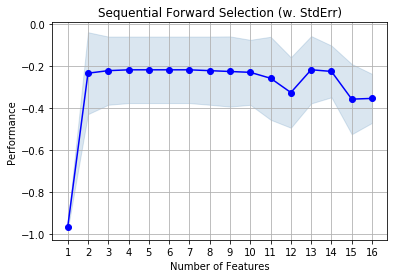

In [17]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

## performance graph (y-axis: r-squared values)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

Thirteen attributes were selected. Let's try bi-directional stepwise selection (combination of forward and backward selection) and compare results.

In [18]:
## Bi-directional stepwise selection
## Please note that floating option was changed to "True"
sfs1 = SFS(MultinomialNB(),
           k_features=(1,X_minmax.shape[1]),
           forward=True, 
           floating=True,
           scoring = 'r2',
           cv = 10)

sfs1.fit(X, y)
# Get the final set of features
sfs1.k_feature_names_     


('review_stars',
 'word_count',
 'correct_spell_ratio',
 'price_included',
 'eigenvector',
 'positive_emotion',
 'negative_emotion')

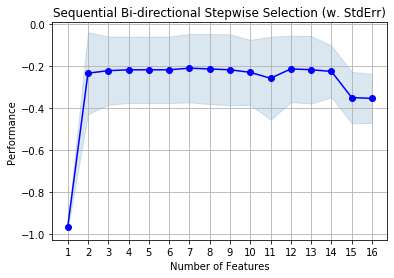

In [19]:
## performance graph (y-axis: r-squared values)
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Bi-directional Stepwise Selection (w. StdErr)')
plt.grid()
plt.show()

Now, we have seven attributes ('review_stars','word_count','correct_spell_ratio','price_included','eigenvector','positive_emotion','negative_emotion'). We have a reduced set of attributes. The performance from both selection methods seems to be not very different. Potentially, using a small set will be better if the performance is not very different? However, it is still early to conclude. We did not separate data into training and testing sets. Also, what is the goal of your classifier? Is it effectiveness or efficiency? Usually, we need to sacrifice one to achieve another. In other words, effectiveness increases when efficiency decreases, and vice versa. We will cover these topics later.